# 워드클라우드 과제
> 
> - 제출자 : 김은민
> - 검색어 : 금리인상

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image

import pandas as pd
import time
import re
import numpy as np

In [2]:
driver_path = "../../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

C:\Users\student\AppData\Local\Temp\ipykernel_6820\2120661022.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [3]:
url_page = 'https://www.google.com/'
driver.get(url_page)

In [4]:
search_word ='금리인상'
css_selector= 'body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input' 
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).send_keys(search_word)

In [5]:
css_selector= 'body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf.emcav > div.UUbT9 > div.aajZCb > div.CqAVzb.lJ9FBc > center > input.gNO89b' 
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [6]:
# 뉴스클릭
css_selector = '#hdtb-msb > div:nth-child(1) > div > div:nth-child(2) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [7]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [8]:
story = soup.find('div','v7W49e').find_all('g-card','ftSUBd')

In [9]:
len(story)

9

In [10]:
# 한페이지에 있는 기사들 제목
story[8].find('div','mCBkyc y355M JQe2Ld nDgy9d').get_text()

#len(story) -1 까지 돌아간다. 

'[뉴욕증시 마감] 75bp 금리인상 공포에 S&P500 3.8%↓ 폭락…비트코인 15%↓'

In [11]:
story[8].find('div','GI74Re nDgy9d').get_text()

'13일(이하 미국 동부시간) 뉴욕증시는 미국 중앙은행인 연방준비제도(Fed·연준)가 이번 주 금리를 0.75%포인트 올리는 등 자이언트 \n스텝을 밟을 수...'

In [12]:
subjects = []  # 제목
articles = []  # 내용

for i in range(1,20):
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")
    
    # 페이지 전체 읽어오기
    story = soup.find('div','v7W49e').find_all('g-card','ftSUBd')
    
    for idx in range(len(story)):  #  한페이지에 담긴 기사 갯수
        subject = story[idx].find('div','mCBkyc y355M JQe2Ld nDgy9d').get_text()
        article = story[idx].find('div','GI74Re nDgy9d').get_text()
        subject = subject.replace('\n','').replace('\t','').strip()
        article = article.replace('\n','').replace('\t','').strip()
    
        subjects.append(subject)
        articles.append(article)
        
    css_selector = '#pnnext > span:nth-child(2)'
    driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()
        

In [13]:
final = articles + subjects

In [14]:
final

["미국 중앙은행 연방준비제도(연준)는 오는 수요일 공개시장위원회(FOMC)를 열어 기준 금리를 정합니다. '기준 금리'의 대상은 연방기금금리(Fed Fund...",
 '“미 연방준비제도(Fed)가 기준금리를 1.0%포인트 인상하는 것은 (시장에) 심상찮은 위험이다.” 마이클 페롤리 JP모건 수석 이코노미스트가 13일(현지...',
 '골드만삭스의 카마크샤야 트리베디 외환·금리·신흥시장 전략 공동 책임자는"미국 연방준비제도(Fed·연준)의 금리인상과 세계증시 내 위험회피 심리로...',
 "'금리인상 수혜주' 라더니…은행주의 배신?, KB·신한·우리·하나금융 등 주요 은행주 일제히 마이너스 금리 급등으로 기업 도산 우려 건전성 악화로...",
 '미국 중앙은행인 연방준비제도의 긴축 정책 전망과 경기침체 공포가 퍼지면서 뉴욕증시가 급락세로 마감했습니다.다우존스30 산업평균지수는 전날보다...',
 '한국의 적정 기준금리가 지난해 말 기준으로 4.8%였으며, 앞으로 금리인상을 과감해게 해야한다는 주장이 나왔다. [출처=한국기업평가]10일 한국기업...',
 "치솟는 집값을 보면서 내 집을 사는 것은 엄두가 안 나 주식에 '다걸기'를 했습니다. 내가 사는 것만 꼭 떨어지고, 팔면 올라가는 건 뭔지. 지금...",
 '지난달 한국은행 금융통화위원회(금통위)가 만장일치로 기준금리를 1.5%에서 1.75%로 인상한 가운데, 다수가 추가 금리인상을 시사했다.',
 '13일(이하 미국 동부시간) 뉴욕증시는 미국 중앙은행인 연방준비제도(Fed·연준)가 이번 주 금리를 0.75%포인트 올리는 등 자이언트 스텝을 밟을 수...',
 "[아시아타임즈=정종진 기자] 미국발 물가 쇼크에 '금리 인상' 수혜주로 꼽히는 주요 금융지주의 주가도 맥을 못추고 있다. 시장금리가 높아지면 주력...",
 '미국의 기준금리 인상이 턱밑까지 다가오면서 한국은행의 고민이 깊어지고 있다. 미국이 금리를 한 번에 0.5%p 올리는 연속 빅스텝을 단행할 경우...',
 '(블룸버그) 50bp(bp=0.0

In [15]:
len(final)

378

In [16]:
text = ' '.join(final)   # str 로 만들기

In [17]:
import nltk
from konlpy.tag import Kkma

In [18]:
kkma = Kkma()

In [19]:
txt_pos = kkma.pos(text)
txt_pos

[('미국', 'NNP'),
 ('중앙', 'NNG'),
 ('은행', 'NNG'),
 ('연방', 'NNG'),
 ('준비', 'NNG'),
 ('제도', 'NNG'),
 ('(', 'SS'),
 ('연', 'NNG'),
 ('주', 'VV'),
 ('ㄴ', 'ETD'),
 (')', 'SS'),
 ('늘', 'VV'),
 ('ㄴ', 'ETD'),
 ('오', 'NNG'),
 ('는', 'JX'),
 ('수요일', 'NNG'),
 ('공개', 'NNG'),
 ('시장', 'NNG'),
 ('위원회', 'NNG'),
 ('(', 'SS'),
 ('FOMC', 'OL'),
 (')', 'SS'),
 ('를', 'JKO'),
 ('열', 'VV'),
 ('어', 'ECD'),
 ('기준', 'NNG'),
 ('금리', 'NNG'),
 ('를', 'JKO'),
 ('정하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ("'", 'SS'),
 ('기준', 'NNG'),
 ('금리', 'NNG'),
 ("'", 'SS'),
 ('의', 'NNG'),
 ('대상', 'NNG'),
 ('은', 'JX'),
 ('연방', 'NNG'),
 ('기금', 'NNG'),
 ('금리', 'NNG'),
 ('(', 'SS'),
 ('Fed', 'OL'),
 ('Fund', 'OL'),
 ('...', 'SE'),
 ('“', 'SS'),
 ('미', 'NNG'),
 ('연방', 'NNG'),
 ('준비', 'NNG'),
 ('제도', 'NNG'),
 ('(', 'SS'),
 ('Fed', 'OL'),
 (')', 'SS'),
 ('가', 'NNG'),
 ('기준', 'NNG'),
 ('금리', 'NNG'),
 ('를', 'JKO'),
 ('1.0', 'NR'),
 ('%', 'SW'),
 ('포인트', 'NNG'),
 ('인상', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'),
 ('것', 'NNB'),
 ('은', 'JX'),
 ('('

In [20]:
txt_nouns = kkma.nouns(text)
txt_nouns

['미국',
 '중앙',
 '중앙은행',
 '은행',
 '연방',
 '연방준비제도',
 '준비',
 '제도',
 '연',
 '오',
 '수요일',
 '공개',
 '공개시장위원회',
 '시장',
 '위원회',
 '기준',
 '금리',
 '의',
 '대상',
 '연방기금금리',
 '기금',
 '미',
 '기준금리',
 '1.0',
 '포인트',
 '인상',
 '위험',
 '마이클',
 '페',
 '페롤',
 '롤',
 '모건',
 '수석',
 '이코노',
 '이코노미스트',
 '미스트',
 '13',
 '13일',
 '일',
 '현지',
 '골드만',
 '스의',
 '카',
 '카마크샤야',
 '마크',
 '샤야',
 '트리',
 '트리베디',
 '베',
 '디',
 '외환',
 '신흥',
 '신흥시장',
 '전략',
 '공동',
 '책임자',
 '금리인상',
 '세계',
 '세계증시',
 '증시',
 '내',
 '위험회피',
 '회피',
 '심리',
 '수혜',
 '라',
 '은행주의',
 '주의',
 '배신',
 '신한',
 '우리',
 '하나',
 '하나금융',
 '금융',
 '등',
 '주요',
 '은행주',
 '마이너스',
 '급등',
 '기업',
 '도산',
 '우려',
 '건전',
 '악화',
 '긴축',
 '정책',
 '전망',
 '경기',
 '경기침체',
 '침체',
 '공포',
 '뉴욕',
 '뉴욕증시',
 '급락세',
 '마감',
 '다우',
 '다우존스30',
 '존스',
 '30',
 '산업',
 '산업평균지수',
 '평균',
 '지수',
 '전날',
 '한국',
 '적정',
 '지난해',
 '말',
 '4.8',
 '앞',
 '게',
 '주장',
 '출처',
 '한국기업평가',
 '평가',
 '10',
 '10일',
 '한국기업',
 '집값',
 '내',
 '집',
 '엄두',
 '주식',
 '걸기',
 '건',
 '무엇',
 '지금',
 '지난달',
 '한국은행',
 '금융통화위원회',
 '통화',
 '금통위',
 '만장일치',
 '1.

In [21]:
txt_morphs = kkma.morphs(text)
txt_morphs

['미국',
 '중앙',
 '은행',
 '연방',
 '준비',
 '제도',
 '(',
 '연',
 '주',
 'ㄴ',
 ')',
 '늘',
 'ㄴ',
 '오',
 '는',
 '수요일',
 '공개',
 '시장',
 '위원회',
 '(',
 'FOMC',
 ')',
 '를',
 '열',
 '어',
 '기준',
 '금리',
 '를',
 '정하',
 'ㅂ니다',
 '.',
 "'",
 '기준',
 '금리',
 "'",
 '의',
 '대상',
 '은',
 '연방',
 '기금',
 '금리',
 '(',
 'Fed',
 'Fund',
 '...',
 '“',
 '미',
 '연방',
 '준비',
 '제도',
 '(',
 'Fed',
 ')',
 '가',
 '기준',
 '금리',
 '를',
 '1.0',
 '%',
 '포인트',
 '인상',
 '하',
 '는',
 '것',
 '은',
 '(',
 '시장',
 '에',
 ')',
 '심상찮',
 '은',
 '위험',
 '이',
 '다',
 '.',
 '”',
 '마이클',
 '페',
 '롤',
 '리',
 'JP',
 '모건',
 '수석',
 '이코노',
 '미스트',
 '가',
 '13',
 '일',
 '(',
 '현지',
 '...',
 '골드만',
 '삭',
 '스의',
 '카',
 '마크',
 '샤야',
 '트리',
 '베',
 '디',
 '외환',
 '·',
 '금리',
 '·',
 '신흥',
 '시장',
 '전략',
 '공동',
 '책임자',
 '는',
 '"',
 '미국',
 '연방',
 '준비',
 '제도',
 '(',
 'Fed',
 '·',
 '연',
 '주',
 'ㄴ',
 ')',
 '의',
 '금리',
 '인상',
 '과',
 '세계',
 '증시',
 '내',
 '위험',
 '회피',
 '심리',
 '로',
 '...',
 "'",
 '금리',
 '인상',
 '수혜',
 '주',
 "'",
 '라',
 '덜',
 '니',
 '…',
 '은행',
 '주의',
 '배신',
 '?',
 ',',
 'KB',
 '

In [22]:
txt_sentences = kkma.sentences(text)
txt_sentences

['미국 중앙은행 연방준비제도( 연 준) 는 오는 수요일 공개시장 위원회 (FOMC )를 열어 기준 금리를 정합니다.',
 "' 기준 금리' 의 대상은 연방기금금리 (Fed Fund... “ 미 연방준비제도 (Fed) 가 기준금리를 1.0% 포인트 인상하는 것은 ( 시장에) 심상찮은 위험이다.",
 '” 마이클 페 롤리 JP 모건 수석 이코노 미스트가 13일( 현지... 골드만 삭 스의 카 마크 샤야 트리 베 디 외환· 금리· 신흥시장 전략 공동 책임자는" 미국 연방준비제도 (Fed· 연 준) 의 금리인상과 세계 증시 내 위험 회피 심리로... \' 금리인상 수혜주\' 라 더니… 은행주의 배신?, KB· 신한· 우리· 하나 금융 등 주요 은행주 일제히 마이너스 금리 급등으로 기업 도산 우려 건전성 악화로... 미국 중앙은행인 연방준비제도의 긴축 정책 전망과 경기침체 공포가 퍼지면서 뉴욕 증시가 급락세로 마감했습니다.',
 '다우 존스 30 산업 평균지수는 전날보다... 한국의 적정 기준금리가 지난해 말 기준으로 4.8% 였으며, 앞으로 금리인상을 과감해 게 해야 한다는 주장이 나왔다.',
 "[ 출처= 한국기업평가 ]10 일 한국기업... 치솟는 집값을 보면서 내 집을 사는 것은 엄두가 안 나 주식에 ' 다",
 "걸기 '를 했습니다.",
 '내가 사는 것만 꼭 떨어지고, 팔면 올라가는 건 뭔지. 지금... 지난달 한국은행 금융통화위원회( 금통위) 가 만장일치로 기준금리를 1.5%에서 1.75% 로 인상한 가운데, 다수가 추가 금리인상을 시사했다.',
 "13일( 이하 미국 동부시간) 뉴욕 증시는 미국 중앙은행인 연방준비제도 (Fed· 연 준) 가 이번 주 금리를 0.75% 포인트 올리는 등 자이언트 스텝을 밟을 수... [ 아시아 타임즈= 정 종진 기자] 미국 발 물가 쇼크에 ' 금리 인상' 수혜주로 꼽히는 주요 금융 지주의 주가도 맥을 못 추고 있다.",
 '시장금리가 높아 지면 주력... 미국의 기준금리 인상이 턱밑까지 다가오면서 한국은행의 고민이 깊어지

In [23]:
result = """
'금리인상'으로 검색된 내용에 대한 형태소분석 결과입니다. 
    - POS태그  \t: {}개 
    - 형태소   \t: {}개 
    - 명사갯수 \t: {}개
    - 문장갯수 \t: {}개
 """.format(len(txt_pos), len(txt_morphs), len(txt_nouns), len(txt_sentences))
print(result)


'금리인상'으로 검색된 내용에 대한 형태소분석 결과입니다. 
    - POS태그  	: 11417개 
    - 형태소   	: 11417개 
    - 명사갯수 	: 1785개
    - 문장갯수 	: 140개
 


In [24]:
from konlpy.tag import Okt
okt = Okt()

In [25]:
constitution_nouns  = okt.nouns(text)
len(constitution_nouns)

4864

In [26]:
one_words = []
tow_words = []
etc_words = []

for noun in constitution_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(694, 3388, 782)

In [27]:
for word in one_words:
    print(word, end='\t')

준	를	니	의	것	리	준	의	내	등	주	말	앞	내	집	것	안	나	를	내	것	꼭	건	로	준	주	등	수	발	맥	번	수	달	수	고	명	중	명	준	의	준	끝	듯	준	의	것	끝	듯	준	의	것	텝	수	준	첫	달	등	후	첫	것	과	낮	때	것	연	연	로	과	발	이	수	더	듯	상	수	더	그	더	것	더	폭	때	등	그	즉	를	넷	것	이	등	세	김	연	주	폭	것	것	석	준	이	국	등	벨	준	것	로	역	등	빚	등	로	것	은	박	준	준	의	등	선	날	전	인	율	준	의	텝	첫	등	국	로	국	률	더	김	무	또	수	더	폭	것	연	로	텝	채	은	은	준	날	두	달	폭	목	금	별	김	무	달	의	것	고	내	텝	이	속	연	로	이	등	이	치	준	이	준	키	볼	컷	도	수	수	고	이	것	뿐	준	것	준	내	준	세	세	준	주	폭	것	고	이	폭	날	것	의	의	장	보	폭	키	리	것	연	것	새	의	재	등	것	것	걸	얼	조	간	회	더	명	중	명	것	연	앞	첫	더	것	등	날	데	고	발	및	사	세	은	최	더	이	이	첫	손	장	날	전	월	세	첫	인	주	주	연	앞	연	준	의	등	폭	날	전	준	의	수	줄	거	줄	달	또	은	것	고	사	강	중	터	고	터	연	재	때	준	를	번	은	겸	숨	것	준	툴	날	준	후	네	것	은	세	준	은	준	준	번	더	달	듯	이	로	준	것	연	로	막	초	준	후	달	등	연	로	총	준	준	건	날	연	로	데	등	준	준	중	친	것	날	뒤	더	달	연	로	채	등	은	듯	준	줄	은	로	준	의	등	준	점	때	거	선	만	악	것	호	준	점	값	로	날	더	것	준	수	수	은	달	것	심	때	상	달	비	권	준	은	새	등	것	은	이	것	나	위	추	적	것	범	회	이	더	뜻	달	이	번	의	은	비	등	준	국	중	준	의	은	은	은	또	것	뒤	숨	연	로	전	수	준	준	의	률	등	속	뒤	국	수	은	도	일	뿐	준	월	약	의	내	이	텝	번	은	연	로	준	낼	것	힘	때	곤	독	폭	등	불	폭	후	달	곳	전	뒤	것	힘	두	의	말	준	의	과	힘	데	첫	또	및	주	선	달	준	밤	준	더	끌	맥	주	은	또	등	준	준	위	은	명	중	명	연	준	텝	준	답	준	

In [28]:
stop_words = ['조선','비즈','가운데','기자','이후','최근']
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

700

In [29]:
constitution_nouns = [ word for word in constitution_nouns if word not in stop_words ]
len(constitution_nouns)

4034

In [30]:
constitution_nouns[:10]

['미국', '중앙은행', '연방', '준비', '제도', '수요일', '공개시장', '위원회', '기준', '금리']

In [31]:
constitution  = nltk.Text(constitution_nouns, name='기사')
type(constitution), len(constitution)

(nltk.text.Text, 4034)

In [32]:
constitution.vocab().most_common(30)

[('인상', 406),
 ('금리', 354),
 ('기준금리', 119),
 ('미국', 80),
 ('물가', 49),
 ('연방', 43),
 ('한국은행', 43),
 ('대출', 43),
 ('시장', 42),
 ('전망', 40),
 ('준비', 34),
 ('추가', 33),
 ('상승', 33),
 ('제도', 32),
 ('중앙은행', 30),
 ('은행', 30),
 ('총재', 27),
 ('증시', 26),
 ('금융', 25),
 ('포인트', 24),
 ('인플레이션', 24),
 ('한국', 23),
 ('영향', 23),
 ('올해', 23),
 ('예상', 22),
 ('하락', 20),
 ('금통위', 18),
 ('회의', 18),
 ('가능성', 18),
 ('우려', 17)]

In [33]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [34]:
# nltk패키지를 통해 konlpy에서 뽑은 명사들 상위 500개 추출
data = constitution.vocab().most_common(500)
len(data)

500

In [35]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

500

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

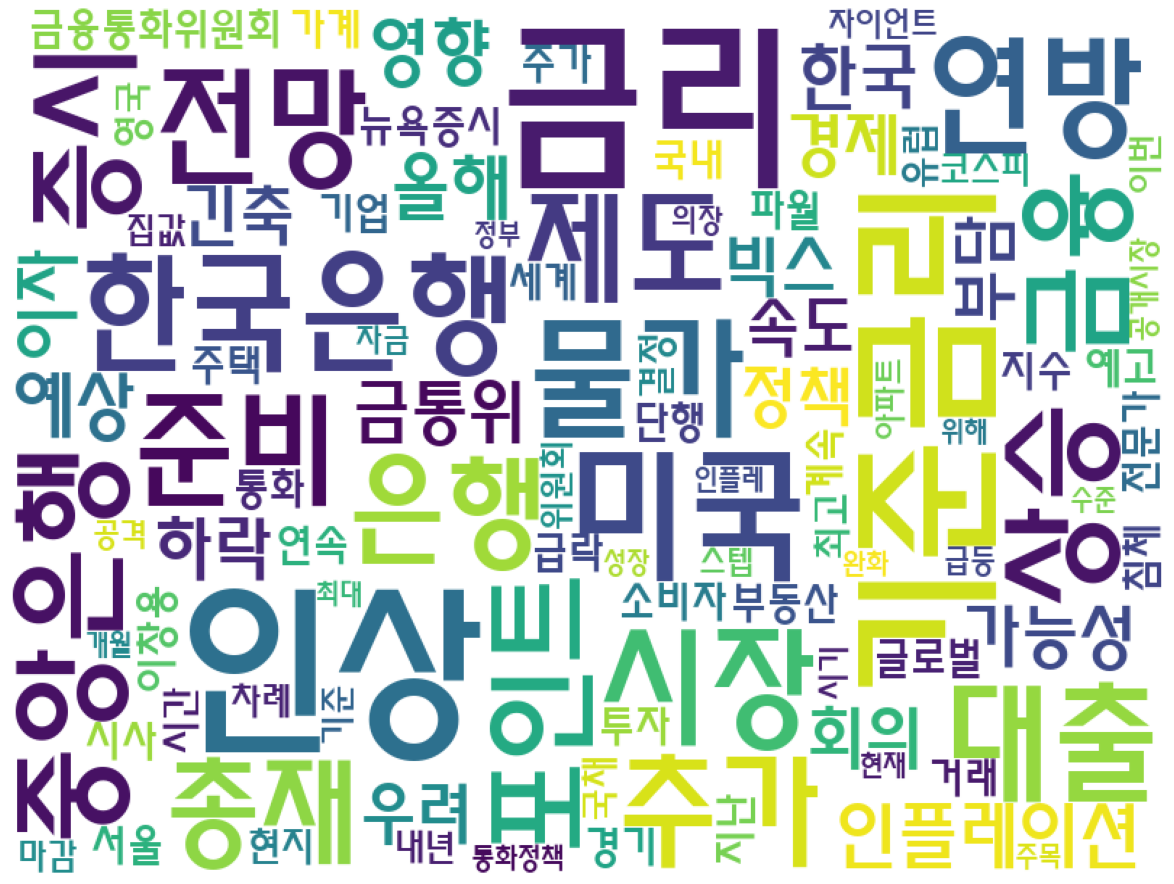

In [38]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'wordcloud/wc_interest_rate_1.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

(-0.5, 167.5, 261.5, -0.5)

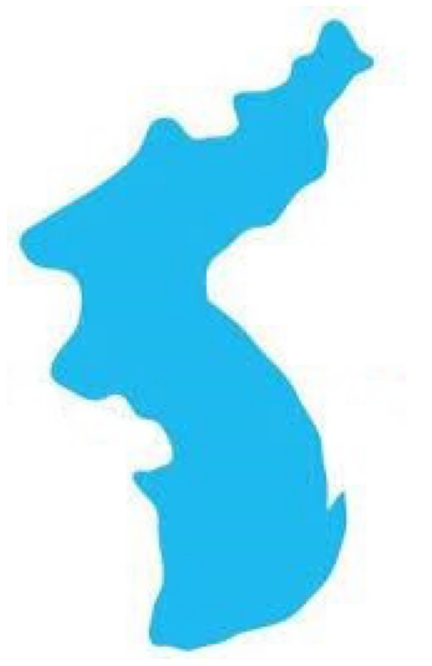

In [40]:
mask_heart  = np.array(Image.open('images/korea.jpg'))
image_color = ImageColorGenerator(mask_heart)
plt.figure(figsize=(12,12))
plt.imshow(mask_heart)
plt.axis('off')

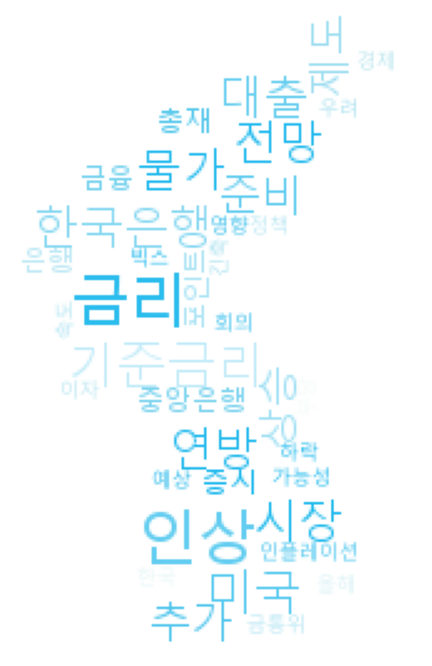

In [41]:
params = {
    "font_path"         :'C:/Windows/Fonts/malgun.ttf',
    "relative_scaling"  : 0.2,
    "mask"              : mask_heart,
    "background_color"  : 'white',
    "max_words"         : 200,
    "min_font_size"     : 6,
    "max_font_size"     : 24,
    "width"             : 1200,
    "height"            : 900,
}

wordcloud = WordCloud(**params).generate_from_frequencies(dict_data)

plt.figure(figsize=(18,12))
plt.imshow(wordcloud.recolor(color_func=image_color))
plt.axis('off')
plt.savefig('wordcloud/wc_interest_rate_2.png')